<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [21]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-12 20:12:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  55.7MB/s    in 3.6s    

2025-06-12 20:12:28 (56.1 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [22]:
!pip install pandas

In [23]:
!pip install matplotlib

In [24]:
!pip install seaborn

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [26]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [27]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

#### Demo 3: Group Data by Age


In [28]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


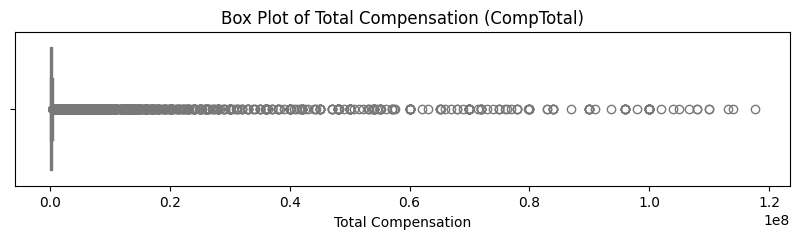

In [29]:
# your code goes here
QUERY = """SELECT CompTotal FROM main"""
df = pd.read_sql_query(QUERY, conn)

#Lets drop NaN in CompTotal
df.dropna(inplace=True)

# Remove extreme outliers
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

#Plot a histogram of CompTotal
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='CompTotal', color='lightblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
#plt.tight_layout()
#plt.grid(axis='x')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


/tmp/ipykernel_324/1193663554.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({


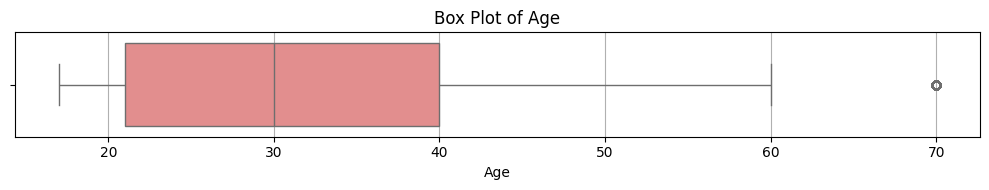

In [30]:
# your code goes here

# Load data
QUERY = "SELECT Age FROM main"
df = pd.read_sql_query(QUERY, conn)

#Clean data
df.dropna(inplace=True)

#  Replace text-based categories with approximate numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

#Convert to numeric (if some values are still strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

#plot Age
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='Age', color='lightcoral')

plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_324/376486744.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({
/tmp/ipykernel_324/376486744.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='CompTotal', palette='coolwarm')


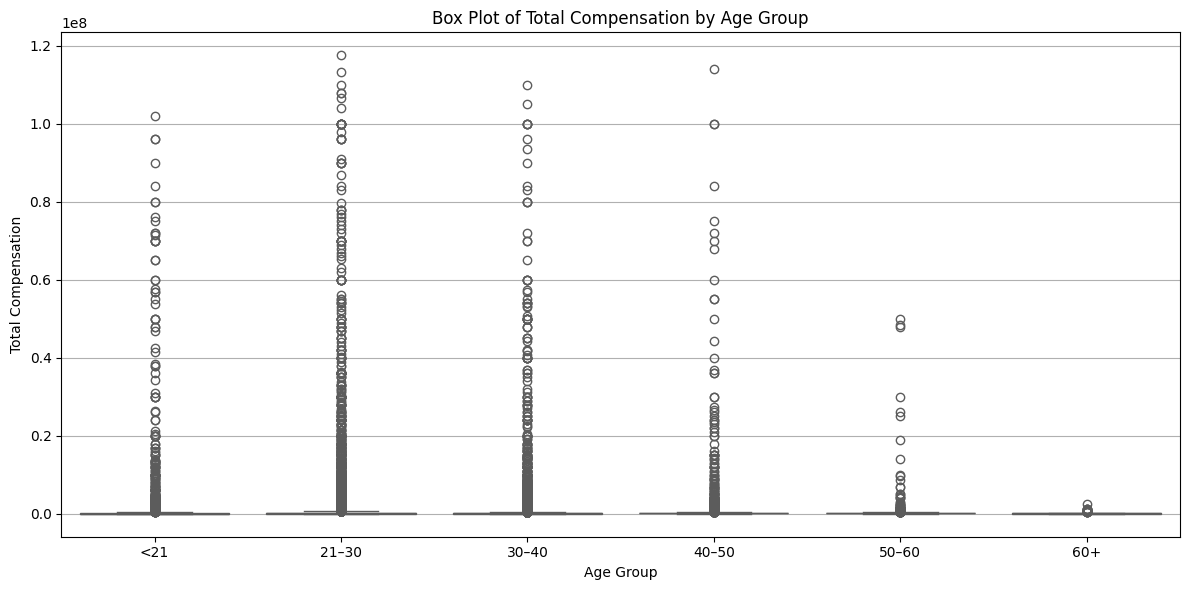

In [31]:
# your code goes here
# Load data
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

#Clean data
df = df[df['CompTotal'].notna() & df['Age'].notna()]

#  Replace text-based categories with approximate numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

#Convert to numeric (if some values are still strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
bins = [17, 21, 30, 40, 50, 60, 70]
labels = ['<21', '21–30', '30–40', '40–50', '50–60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

#  remove top 1% to reduce skew
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AgeGroup', y='CompTotal', palette='coolwarm')

plt.title('Box Plot of Total Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_324/55088325.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SatisfactionLevel', y='CompTotal', palette='viridis')


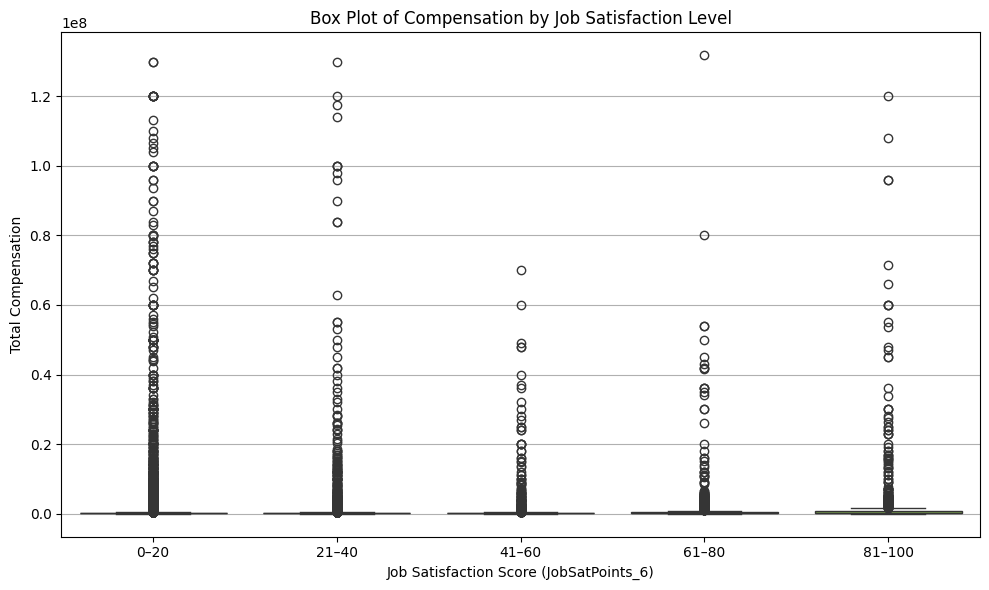

In [32]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main """
df = pd.read_sql_query(QUERY, conn)
#Clean data
df.dropna(inplace=True)

# Remove top 1% of CompTotal to reduce skew
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# Bin satisfaction scores into groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']

df['SatisfactionLevel'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SatisfactionLevel', y='CompTotal', palette='viridis')

plt.title('Box Plot of Compensation by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Total Compensation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_324/2811499658.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.dropna(inplace=True)
/tmp/ipykernel_324/2811499658.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='DevType', y='ConvertedCompYearly', palette='Set2')


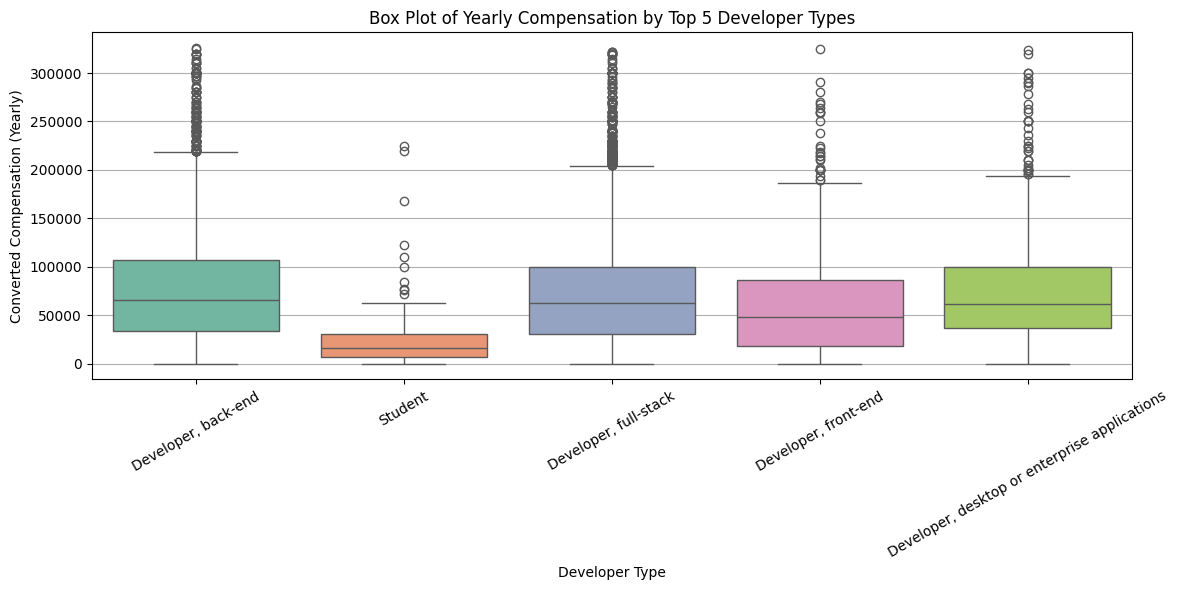

In [35]:
# your code goes here
QUERY = """ SELECT DevType, ConvertedCompYearly FROM main """
df = pd.read_sql_query(QUERY, conn)

# Split semicolon-separated DevTypes into separate rows
df['DevType'] = df['DevType'].str.split(';').explode().str.strip()

# Find top 5 most common DevTypes
top_5_roles = df['DevType'].value_counts().nlargest(5).index

# Filter to only those top 5 roles
df_top = df[df['DevType'].isin(top_5_roles)]
df_top.dropna(inplace=True)

# Remove top 1% of compensation to reduce skew
df_top = df_top[df_top['ConvertedCompYearly'] < df_top['ConvertedCompYearly'].quantile(0.99)]

# plot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='DevType', y='ConvertedCompYearly', palette='Set2')
plt.title('Box Plot of Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation (Yearly)')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_324/368318218.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.dropna(inplace=True)
/tmp/ipykernel_324/368318218.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Country', y='CompTotal', palette='pastel')


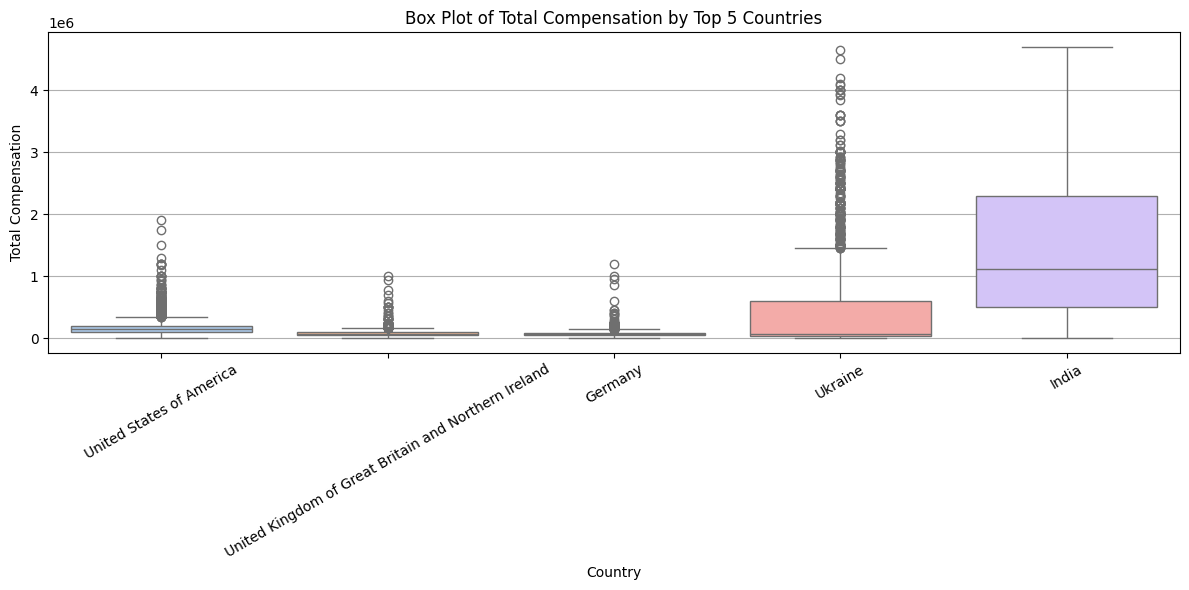

In [40]:
# your code goes here
QUERY = """SELECT Country, CompTotal FROM main """
df = pd.read_sql_query(QUERY, conn)

# Find top 5 Country
top_5_roles = df['Country'].value_counts().nlargest(5).index

# Filter to only those top 5 roles
df_top = df[df['Country'].isin(top_5_roles)]
#Clean data
df_top.dropna(inplace=True)

# Remove extreme outliers
df_top = df_top[df_top['CompTotal'] < df_top['CompTotal'].quantile(0.99)]

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Country', y='CompTotal', palette='pastel')

plt.title('Box Plot of Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_324/2653950790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Employment', y='CompTotal', palette='Set3')


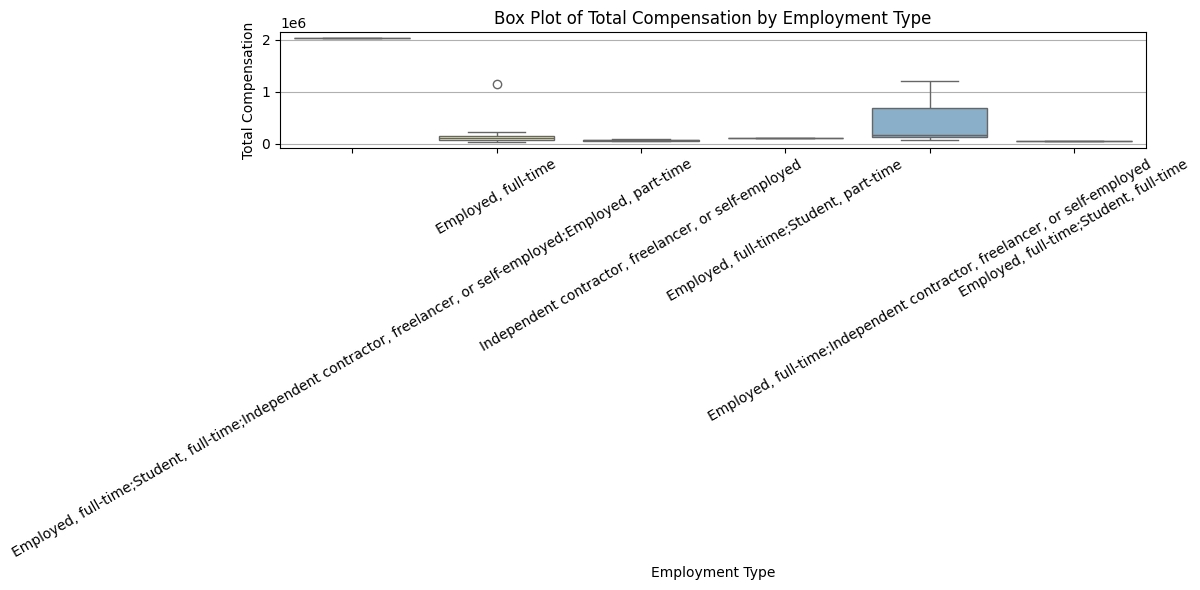

In [46]:
# your code goes here
QUERY = """ SELECT CompTotal, Employment FROM main """
df = pd.read_sql_query(QUERY, conn)

# Remove top 1% compensation to reduce skew
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]
df.dropna(inplace=True)
#lets take the 30 first lines 
df = df.head(30)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Employment', y='CompTotal', palette='Set3')

plt.title('Box Plot of Total Compensation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_324/3366280666.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SatisfactionLevel', y='YearsCodePro', palette='coolwarm')


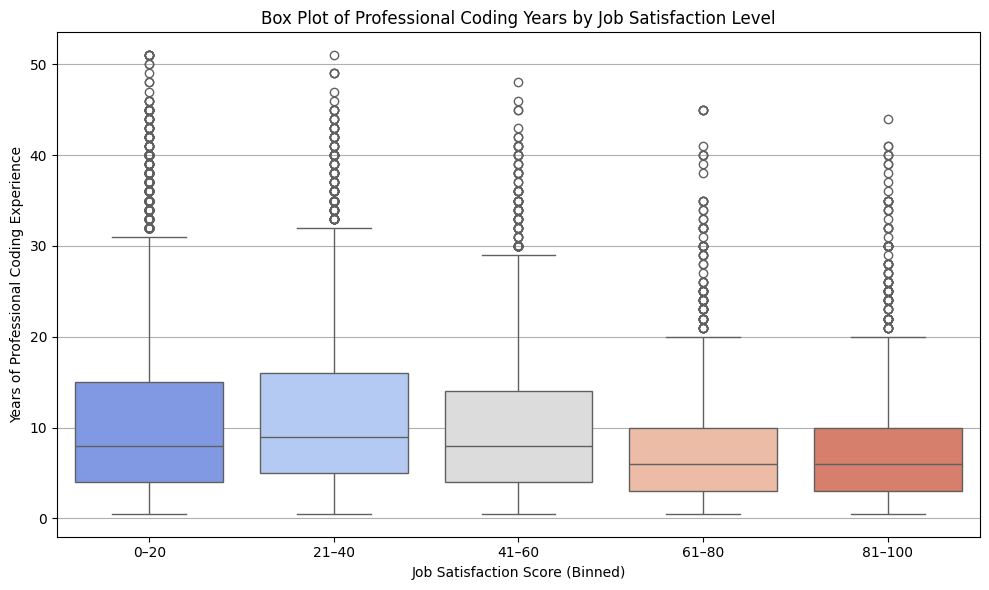

In [47]:
# your code goes here

QUERY = """SELECT YearsCodePro, JobSatPoints_6 FROM main """
df = pd.read_sql_query(QUERY, conn)

df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
df['SatisfactionLevel'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SatisfactionLevel', y='YearsCodePro', palette='coolwarm')

plt.title('Box Plot of Professional Coding Years by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score (Binned)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [18]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
